In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [4]:
data = pd.read_csv('data/Advertising.csv')

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


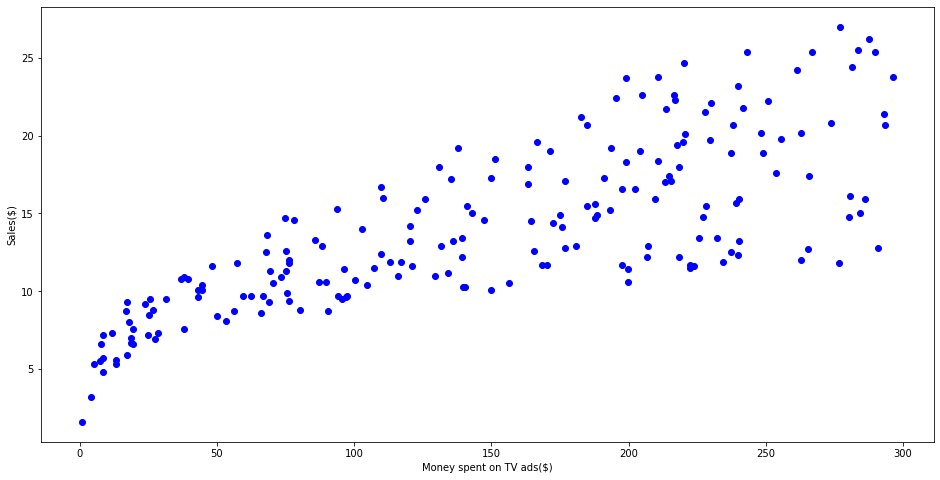

In [7]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads($)")
plt.ylabel('Sales($)')
plt.show()

In [10]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print('The linear model is: {:.5} + {:.5}X'.format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: 7.0326 + 0.047537X


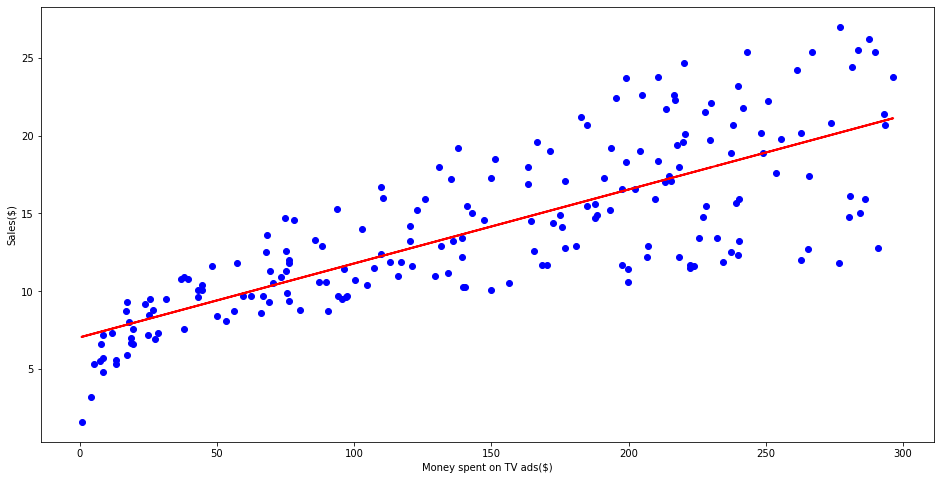

In [13]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='blue'
)
plt.plot(
    data['TV'],
    predictions,
    c = 'red',
    linewidth=2
)
plt.xlabel("Money spent on TV ads($)")
plt.ylabel('Sales($)')
plt.show()

In [15]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.47e-42
Time:                        16:59:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [16]:
Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)

reg.fit(Xs, y)
print("the linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

the linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [17]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
X2 = sm.add_constant(X)

est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.58e-96
Time:                        17:21:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0